In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import plotly.express as px

In [38]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

/opt/homebrew/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/homebrew/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [39]:
questionaire_df = pd.read_csv('/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Galactagogue_buying_patterns/data/Ryan_DataforRay_MissingReplaced_2022.09.30.csv')
questionaire_df.head(20)

,ID,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1,2,3,2,2,2,2,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2
1,2,1,2,2,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2
2,3,1,1,2,2,1,1,1,1,1,1,3,3,3,2,1,1,1,3,1,3,1,2,2,3,3,3,3,3,3,2,3,3,3,1,2,1,2,1,3,3,1,2,1,2,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,3,2,1,1,2
3,4,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,2,2,1,1,1,2,1,2,2,2,2,2,2,2,2
4,5,1,1,2,2,1,1,3,2,2,3,3,3,3,2,1,1,1,3,2,1,1,2,1,3,3,3,3,3,3,3,3,3,3,2,2,2,3,3,3,2,3,3,3,2,1,2,2,1,1,2,2,1,1,1,2,1,1,1,1,2,2,2,1,2
5,6,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,2,3,3,3,3,3,3,3,2,1,2,1,1,1,1,2,2,1,1,2,1,1,2,2,2,2,1,2,2
6,7,1,2,2,3,2,2,2,3,1,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,1,3,3,3,3,3,3,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2
7,8,1,2,2,1,-99,-99,-99,-99,1,-99,-99,-99,-99,-99,1,1,1,-99,1,-99,1,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,3,1,1,1,1,1,1,1,2,2,1,1,1,1,2,1,1,1,2,1,2,2,1,-99,2,2,1,1
8,9,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,3,1,2,2,2,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
9,10,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2


In [40]:
questionaire_df.shape

(1420, 65)

Checking for null values.

In [95]:
questionaire_df.isna().sum() 

ID              0
everbev         0
everherb        0
evermed         0
oats            0
               ..
onlineforum     0
blog            0
websites        0
searchengine    0
app             0
Length: 65, dtype: int64

In [96]:
questionaire_df.columns

Index(['ID', 'everbev', 'everherb', 'evermed', 'oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat', 'ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle', 'domperidone', 'metaclopramide',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress',
       'coparent', 'family', 'friend', 'lactationconsult', 'pediatrician',
       'obgyn', 'midwife', 'doula', 'nurse', 'wic', 'hospital', 'books',
       'facebook', 'instagram', 'twitter', 'pinterest', 'onlineforum', 'blog',
       'websites', 'searchengine', 'app'],
      dtype='object')

For our analysis, we are only selecting the galactagogues

In [97]:
beh_strategies = ['ID','increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress']
beh_strategies_df = pd.DataFrame(data = questionaire_df, columns = beh_strategies)
beh_strategies_df.head()

,ID,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress
0,1,2,1,2,3,2,2,2,2,3,3
1,2,3,3,3,3,3,3,2,3,3,3
2,3,1,2,1,2,1,3,3,1,2,1
3,4,1,1,1,1,1,1,1,1,1,1
4,5,2,2,2,3,3,3,2,3,3,3


# Exploratory Data Analysis

In [98]:
beh_strategies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               1420 non-null   int64
 1   increasebf       1420 non-null   int64
 2   increaseexpress  1420 non-null   int64
 3   skintoskin       1420 non-null   int64
 4   shield           1420 non-null   int64
 5   massage          1420 non-null   int64
 6   pumpwhilebf      1420 non-null   int64
 7   pumpboth         1420 non-null   int64
 8   pumpafter        1420 non-null   int64
 9   warmed           1420 non-null   int64
 10  reducestress     1420 non-null   int64
dtypes: int64(11)
memory usage: 122.2 KB


There are 1420 non null rows in the data set with all the columns having integer datatype.

Dropping the rows having -99 value as it signifies missing responses from the candidate.

In [99]:
beh_strategies_df=beh_strategies_df.replace(-99,np.nan).dropna(axis = 0, how = 'any')

In [100]:
beh_strategies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1416.0,709.652542,409.787587,1.0,354.75,709.5,1064.25,1420.0
increasebf,1416.0,1.964689,0.776071,1.0,1.00,2.0,3.00,3.0
increaseexpress,1416.0,2.134181,0.777104,1.0,2.00,2.0,3.00,3.0
skintoskin,1416.0,1.788136,0.695488,1.0,1.00,2.0,2.00,3.0
shield,1416.0,2.518362,0.710110,1.0,2.00,3.0,3.00,3.0
massage,1416.0,1.870056,0.815092,1.0,1.00,2.0,3.00,3.0
pumpwhilebf,1416.0,2.376412,0.770651,1.0,2.00,3.0,3.00,3.0
pumpboth,1416.0,1.871469,0.813581,1.0,1.00,2.0,3.00,3.0
pumpafter,1416.0,2.156073,0.758699,1.0,2.00,2.0,3.00,3.0
warmed,1416.0,2.580508,0.658096,1.0,2.00,3.0,3.00,3.0


In [101]:
beh_strategies_df.increasebf.value_counts()

2.0    562
1.0    452
3.0    402
Name: increasebf, dtype: int64

In [102]:
beh_strategies_df.iloc[:,1:].shape

(1416, 10)

Replacing with 1 with True while 2 and 3 with False

In [103]:
beh_strategies_df = beh_strategies_df.iloc[:,1:].replace({3: False,1: True, 2: False}, regex = True)

In [104]:
beh_strategies_df.head(10)

,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress
0,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,True,False,False,True,False,True
3,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,True,False,True,False,False,False,False,False,False,True
7,True,True,True,False,True,True,True,True,True,True
8,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False


In [105]:
beh_strategies_counts = []
for i in beh_strategies_df.columns:
    beh_strategies_counts.append((beh_strategies_df[i] == True).sum())
#beh_strategies_counts.sort(reverse = True)

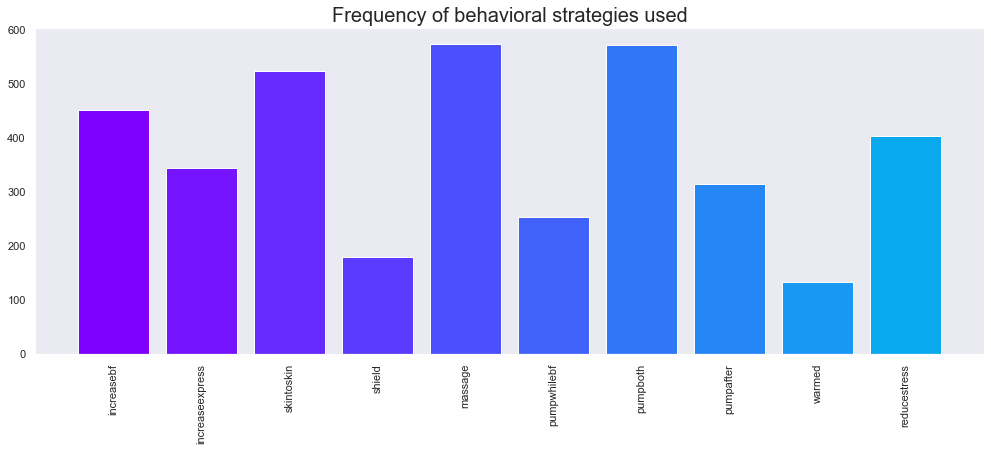

In [106]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.figure(figsize=(17,6))
plt.bar(beh_strategies_df.columns, beh_strategies_counts,color = color)
plt.title('Frequency of behavioral strategies used', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

__TERMINOLOGIES__

__Support__ : Its the default popularity of an item. In mathematical terms, the support of item A is the ratio of transactions involving A to the total number of transactions.

__Confidence__ : Likelihood that customer will buy both products A and B. It is the ratio of the number of transactions involving both A and B and the number of transactions involving B.
    
    Confidence(A => B) = Support(A, B)/Support(A)

__Lift__ : Increase in the sale of A when you sell B.

    Lift(A => B) = Confidence(A, B)/Support(B)

    Lift (A => B) = 1 means that there is no correlation within the itemset.

    Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, A, and B, are more likely to be bought together.
    
    Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, A, and B, are unlikely to be bought together.

Calculating the support for each of the galactagogues

In [107]:
#Calculate the support
support = beh_strategies_df.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support

,support
massage,0.405367
pumpboth,0.403249
skintoskin,0.370056
increasebf,0.319209
reducestress,0.284605
increaseexpress,0.243644
pumpafter,0.221751
pumpwhilebf,0.179379
shield,0.127119
warmed,0.094633


__Apriori Algorithm:__ refers to the algorithm which is used to calculate the association rules between objects. It means how two or more objects are related to one another. In other words, we can say that the apriori algorithm is an association rule leaning that analyzes that people who bought product A also bought product B.

Apriori algorithm assumes that any subset of a frequent itemset must be frequent. Its the algorithm behind Market Basket Analysis. Say, a transaction containing {Grapes, Apple, Mango} also contains {Grapes, Mango}. So, according to the principle of Apriori, if {Grapes, Apple, Mango} is frequent, then {Grapes, Mango} must also be frequent.

In [18]:
frequent_itemsets = apriori(beh_strategies_df, min_support= 0.05, use_colnames=True, max_len = 3)
rules = association_rules(frequent_itemsets, metric="confidence",  min_threshold = 0.5)

Closed frequent itemsets were generated at a minimum support value of 5%, (i.e. thepattern of variable values was observed in at least 5% of the dataset)

Rules were generated that met a confidence level of 50% (i.e. in at least 50% of the cases thatxwasobserved,ywas also observed).

In [20]:
display(rules.sort_values(by ='confidence', ascending=False).head(50))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
233,"(pumpafter, warmed)",(massage),0.052966,0.405367,0.050847,0.960000,2.368223,0.029377,14.865819
228,"(pumpboth, warmed)",(massage),0.075565,0.405367,0.071328,0.943925,2.328568,0.040696,10.604284
150,"(increaseexpress, warmed)",(massage),0.064266,0.405367,0.058616,0.912088,2.250029,0.032565,6.763948
191,"(warmed, skintoskin)",(massage),0.060028,0.405367,0.054379,0.905882,2.234720,0.030045,6.317973
35,(warmed),(massage),0.094633,0.405367,0.085452,0.902985,2.227573,0.047091,6.129292
217,"(pumpafter, shield)",(pumpboth),0.064972,0.403249,0.058616,0.902174,2.237265,0.032416,6.100126
137,"(increaseexpress, shield)",(pumpboth),0.059322,0.403249,0.052966,0.892857,2.214161,0.029045,5.569680
84,"(shield, increasebf)",(pumpboth),0.071328,0.403249,0.063559,0.891089,2.209776,0.034797,5.479263
97,"(warmed, increasebf)",(massage),0.063559,0.405367,0.056497,0.888889,2.192799,0.030732,5.351695
179,"(shield, skintoskin)",(pumpboth),0.074859,0.403249,0.066384,0.886792,2.199121,0.036197,5.271304


Rules identified:  247


In [102]:
# rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
# rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))

In [101]:
#rules[(rules['antecedent_len'] >= 2) & (rules['confidence'] > 0.85) & (rules['lift'] > 1.2)].sort_values(by='confidence',ascending=False).head(10)

Another set of rules are generated using metric as "lift".

In [104]:
rules_1 = association_rules(frequent_itemsets, metric="lift",  min_threshold = 2)

In [106]:
display(rules_1.sort_values(by ='lift', ascending=False).head(10))
print("Rules identified: ", len(rules_1))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,(increaseexpress),"(warmed, increasebf)",0.243644,0.063559,0.052260,0.214493,3.374686,0.036774,1.192148
45,"(warmed, increasebf)",(increaseexpress),0.063559,0.243644,0.052260,0.822222,3.374686,0.036774,4.254502
47,(warmed),"(increaseexpress, increasebf)",0.094633,0.165254,0.052260,0.552239,3.341753,0.036621,1.864266
46,"(increaseexpress, increasebf)",(warmed),0.165254,0.094633,0.052260,0.316239,3.341753,0.036621,1.324100
187,"(increaseexpress, pumpwhilebf)",(pumpafter),0.105932,0.221751,0.076977,0.726667,3.276943,0.053487,2.847251
190,(pumpafter),"(increaseexpress, pumpwhilebf)",0.221751,0.105932,0.076977,0.347134,3.276943,0.053487,1.369450
173,(warmed),"(increaseexpress, massage)",0.094633,0.191384,0.058616,0.619403,3.236438,0.040505,2.124598
172,"(increaseexpress, massage)",(warmed),0.191384,0.094633,0.058616,0.306273,3.236438,0.040505,1.305077
109,(pumpafter),"(pumpwhilebf, increasebf)",0.221751,0.099576,0.069915,0.315287,3.166283,0.047834,1.315037
104,"(pumpwhilebf, increasebf)",(pumpafter),0.099576,0.221751,0.069915,0.702128,3.166283,0.047834,2.612692


Rules identified:  318


In [107]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules[(rules['antecedent_len'] >= 2) & (rules['confidence'] > 0.85)].sort_values(by='lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
233,"(warmed, pumpafter)",(massage),0.052966,0.405367,0.050847,0.960000,2.368223,0.029377,14.865819,2,1
228,"(warmed, pumpboth)",(massage),0.075565,0.405367,0.071328,0.943925,2.328568,0.040696,10.604284,2,1
150,"(warmed, increaseexpress)",(massage),0.064266,0.405367,0.058616,0.912088,2.250029,0.032565,6.763948,2,1
217,"(pumpafter, shield)",(pumpboth),0.064972,0.403249,0.058616,0.902174,2.237265,0.032416,6.100126,2,1
190,"(warmed, skintoskin)",(massage),0.060028,0.405367,0.054379,0.905882,2.234720,0.030045,6.317973,2,1
137,"(increaseexpress, shield)",(pumpboth),0.059322,0.403249,0.052966,0.892857,2.214161,0.029045,5.569680,2,1
83,"(increasebf, shield)",(pumpboth),0.071328,0.403249,0.063559,0.891089,2.209776,0.034797,5.479263,2,1
178,"(skintoskin, shield)",(pumpboth),0.074859,0.403249,0.066384,0.886792,2.199121,0.036197,5.271304,2,1
96,"(warmed, increasebf)",(massage),0.063559,0.405367,0.056497,0.888889,2.192799,0.030732,5.351695,2,1
136,"(increaseexpress, shield)",(massage),0.059322,0.405367,0.052260,0.880952,2.173221,0.028213,4.994915,2,1


__Antecedent:__ refers to the items on the LEFT ie., the item which the customer buy.

__Consequent:__ refers to the items on the RIGHT ie., the item which the customer follows to buy.

In [108]:
fig = px.scatter_3d(rules, x='confidence', y='support', z='lift', opacity=0.7, color='antecedents')
                    #color='petal_length', symbol='species')
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

/opt/homebrew/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/homebrew/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<>:24: DeprecationWarning:

invalid escape sequence \d

<>:24: DeprecationWarning:

invalid escape sequence \d

/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_46244/3930746849.py:24: DeprecationWarning:

invalid escape sequence \d



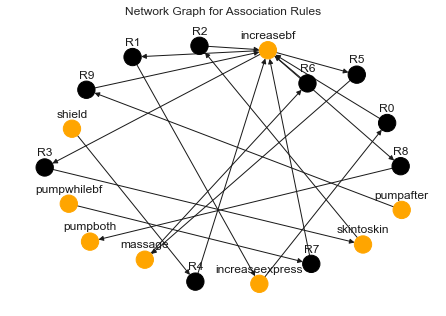

In [109]:
def draw_network(rules, rules_to_show):
      # Directional Graph from NetworkX
  network = nx.DiGraph(directed=True)
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12
  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

__Inference:__

From the results it’s very clear that, higher the LIFT value, stronger the correlation between the antecedents and the consequents.

A lift greater than 1 suggests that the presence of the antecedent increases the chances that the consequent will occur in a given transaction.

Lift below 1 indicates that purchasing the antecedent reduces the chances of purchasing the consequent in the same transaction. Note: This could indicate that the items are seen by customers as alternatives to each other.
When the lift is 1, then purchasing the antecedent makes no difference on the chances of purchasing the consequent.


# Rule Pruning

We will try to calculate the mean, median, skewness and kurtosis of the dataset and decide values of the metrics for the asscoiation rules model.

In [41]:
df=questionaire_df.replace(-99,np.nan).dropna(axis = 0, how = 'any')
df.head(10)

,ID,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,2.0,1,2,3,2.0,2.0,2,2,3,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2,1,2.0,2.0,2.0,2.0,2.0
1,2,1,2,2,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,3.0,3,3,3,3.0,3.0,2,3,3,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,2,2.0,2.0,2.0,1.0,2.0
2,3,1,1,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,2,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2,3.0,3,3,1.0,2,1,2,1.0,3.0,3,1,2,1,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2,2,2,3.0,2.0,1.0,1.0,2.0
3,4,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,1.0,1,1,1,1.0,1.0,1,1,1,1,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2,2,2,2.0,2.0,2.0,2.0,2.0
4,5,1,1,2,2.0,1.0,1.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,2.0,2,2,3,3.0,3.0,2,3,3,3,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1,1,1,2.0,2.0,2.0,1.0,2.0
5,6,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,2.0,3,2,3,3.0,3.0,3,3,3,3,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1,2,2,2.0,2.0,1.0,2.0,2.0
6,7,1,2,2,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,1.0,3,1,3,3.0,3.0,3,3,3,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2,2,1.0,2.0,1.0,2.0,2.0
8,9,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,2.0,2,2,2,2.0,2.0,2,2,3,1,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0
9,10,2,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,3.0,3,2,3,3.0,3.0,3,3,3,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,2,2,2.0,2.0,2.0,2.0,2.0
10,11,1,2,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3,3,3.0,3,3,3,3.0,3.0,1,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3,3.0,3.0,3.0,3.0,3.0


In [42]:
df = df.iloc[:,1:].replace({3: 0, 2: 0}, regex = True)

In [43]:
df.columns

Index(['everbev', 'everherb', 'evermed', 'oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat', 'ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle', 'domperidone', 'metaclopramide',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress',
       'coparent', 'family', 'friend', 'lactationconsult', 'pediatrician',
       'obgyn', 'midwife', 'doula', 'nurse', 'wic', 'hospital', 'books',
       'facebook', 'instagram', 'twitter', 'pinterest', 'onlineforum', 'blog',
       'websites', 'searchengine', 'app'],
      dtype='object')

In [44]:
column_names = ['ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle']
df['supplements_sum']= df[column_names].sum(axis=1)

In [45]:
column_names = [#'domperidone', 'metaclopramide',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress']
df['beh_strategies_sum']=df[column_names].sum(axis=1)

In [46]:
df.head(10)

,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app,supplements_sum,beh_strategies_sum
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,1,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,1.0,0.0,0,1,0,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,5.0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,1,1,1,1.0,1.0,1,1,1,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
4,1,1,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
8,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
supplements_mean = df['supplements_sum'].mean()
beh_strategies_mean = df['beh_strategies_sum'].mean()
print(supplements_mean, beh_strategies_mean)

0.15410107705053852 2.532725766362883


In [23]:
supplements_median = df['supplements_sum'].median()
beh_strategies_median = df['beh_strategies_sum'].median()
print( supplements_median, beh_strategies_median)

0.0 2.0


In [47]:
beh_strat_df = df[df['beh_strategies_sum'] != 0]

In [48]:
len(beh_strat_df)

846

In [25]:
from scipy.stats import describe
describe(beh_strat_df['beh_strategies_sum'], axis=0)

DescribeResult(nobs=846, minmax=(1.0, 10.0), mean=3.6134751773049647, variance=5.274090394057661, skewness=0.6551770011627738, kurtosis=-0.44996568776793167)

Skewness essentially measures the symmetry of the distribution. The skewness value of 0.65 suggests that the data is slightly positive skewed. 

And the distribution has a negative kurtosis value of -0.44. This indicates that the distribution has lighter tails than the normal distribution.

In [26]:
beh_strategies_median_new = beh_strat_df['beh_strategies_sum'].median()
beh_strategies_median_new

3.0

In [27]:
beh_strat_df = beh_strat_df[column_names]
beh_strat_df

,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress
0,0.0,1,0,0,0.0,0.0,0,0,0,0
2,1.0,0,1,0,1.0,0.0,0,1,0,1
3,1.0,1,1,1,1.0,1.0,1,1,1,1
6,1.0,0,1,0,0.0,0.0,0,0,0,1
8,0.0,0,0,0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1413,1.0,1,0,0,1.0,0.0,1,1,0,1
1414,0.0,1,1,1,0.0,0.0,1,0,0,0
1415,0.0,0,0,0,0.0,0.0,0,0,0,1
1416,0.0,1,1,0,1.0,1.0,0,1,0,0


In [28]:
beh_strategies_counts_new = []
for i in beh_strat_df.columns:
    beh_strategies_counts_new.append(( beh_strat_df[i] == True).sum())
#beh_strategies_counts_new.sort(reverse = True)

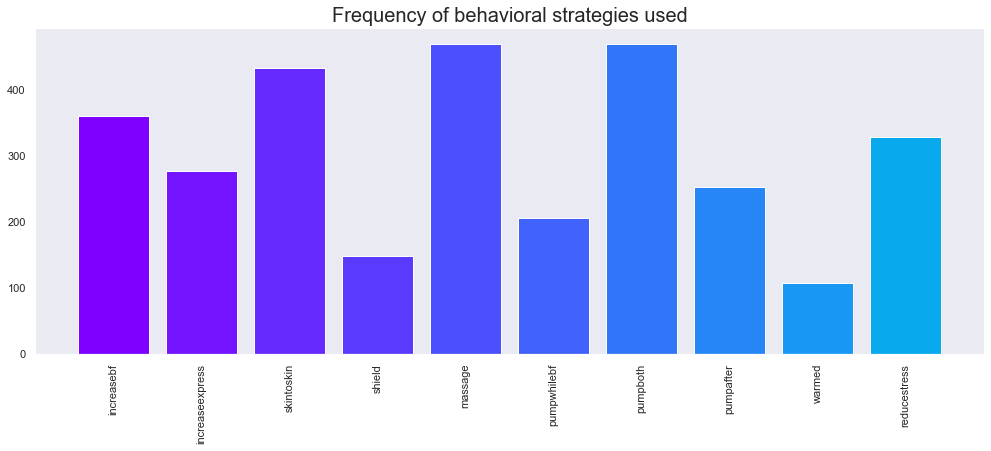

In [29]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.figure(figsize=(17,6))
plt.bar(beh_strat_df.columns, beh_strategies_counts_new,color = color)
plt.title('Frequency of behavioral strategies used', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [30]:
support_new = beh_strat_df.mean()
support_new

increasebf         0.426714
increaseexpress    0.328605
skintoskin         0.511820
shield             0.176123
massage            0.555556
pumpwhilebf        0.243499
pumpboth           0.555556
pumpafter          0.299054
warmed             0.127660
reducestress       0.388889
dtype: float64

In [31]:
frequent_itemsets = apriori(beh_strat_df, min_support= 0.10, use_colnames=True, max_len = 4)
rules_2 = association_rules(frequent_itemsets, metric="confidence",  min_threshold = 0.5)

/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Dropping rules that have same lift.

In [32]:
rules_2.drop_duplicates(subset="lift",keep=False, inplace=True)

To identify our best rules, we will want to execute the following filters.

1. A conviction over 1
2. A leverage over 0
3. A confidence greater than a consequent’s support
4. A Lift over 1

All of these metrics imply a high association that if someone is going to buy our first product ( the antecedent ), they will consume the next product as well ( the consequent ). 

In [33]:
rules_2 = rules_2[(rules_2['conviction']> 1) & (rules_2['leverage']>0 & (rules_2['confidence']> rules_2['consequent support']) )]

In [35]:
display(rules_2.sort_values(by ='support', ascending=False).head(30))
print("Rules identified: ", len(rules_2))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(increasebf),(pumpboth),0.426714,0.555556,0.261229,0.612188,1.101939,0.024166,1.146032
11,(increaseexpress),(massage),0.328605,0.555556,0.255319,0.776978,1.398561,0.072761,1.992832
13,(increaseexpress),(pumpboth),0.328605,0.555556,0.247045,0.751799,1.353237,0.064486,1.790660
31,(reducestress),(massage),0.388889,0.555556,0.247045,0.635258,1.143465,0.030996,1.218519
34,(pumpafter),(pumpboth),0.299054,0.555556,0.234043,0.782609,1.408696,0.067901,2.044444
35,(reducestress),(pumpboth),0.388889,0.555556,0.232861,0.598784,1.077812,0.016811,1.107744
29,(pumpafter),(massage),0.299054,0.555556,0.228132,0.762846,1.373123,0.061991,1.874074
68,"(increasebf, massage)",(pumpboth),0.277778,0.555556,0.217494,0.782979,1.409362,0.063173,2.047930
66,"(pumpboth, increasebf)",(massage),0.261229,0.555556,0.217494,0.832579,1.498643,0.072367,2.654655
23,(reducestress),(skintoskin),0.388889,0.511820,0.215130,0.553191,1.080831,0.016089,1.092593


Rules identified:  234


__Creating the Zhang's Metric__

The Zhang Metric is a metric that ranges from -1 to 1 to represent both positive association and perfect disassociation. This is a useful metric if there are specific items that you should never put next to each other, even though they have been consumed previously.

This allows us to ensure we are creating the best distance between two items that are dissociated and able to optimize for the most lift across the entire store, not just one object.

In [127]:
# Defining a function to compute Zhang's metric
def zhang(antecedent, consequent):
    # Computing the support of each book
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Computing the support of both books
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Returning Zhang's metric
    return numerator / denominator

In [187]:
# Defining an empty list for metrics
zhangs = []

for i in range(2,len(rules_2)):
    antecedent = rules_2['antecedents'][i]
    consequent = rules_2['consequents'][i]
    print(antecedent)    
    # Extracting the antecedent and consequent columns
    # antecedent = rules_2[itemset[0]]
    # consequent = rules_2[itemset[1]]

    # zhangs.append(zhang(antecedent, consequent))
#rules_2['zhang'] = zhangs

frozenset({'skintoskin'})
frozenset({'increasebf'})
frozenset({'shield'})


KeyError: 5

# Creating Rules after combining Food items, Supplements and Behavioral Strategies 

In [9]:
column_names = ['oats', 'lacttreathome',
       'lacttreatstore', 'brewersyeast', 'coconutdrink', 'sportdrink',
       'pinkdrink', 'noalcbeer', 'beer', 'wine', 'lacttea', 'fruit', 'veg',
       'seeds', 'beans', 'wholegrains', 'nuts', 'meat','ComboSupp',
       'fenugreek', 'thistel', 'shatavari', 'goatrue', 'moringa', 'alfalfa',
       'fennel', 'milkthistle', 'nettle', 'domperidone', 'metaclopramide',
       'increasebf', 'increaseexpress', 'skintoskin', 'shield', 'massage',
       'pumpwhilebf', 'pumpboth', 'pumpafter', 'warmed', 'reducestress']
df['food_supp_beh_sum'] = df[column_names].sum(axis=1)

In [10]:
df.head(10)

,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,hospital,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app,food_supp_beh_sum
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,1,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,1.0,0.0,0,1,0,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0.0,0.0,1.0,1.0,0.0,16.0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,1,1,1,1.0,1.0,1,1,1,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,10.0
4,1,1,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,1,1,0.0,0.0,0.0,1.0,0.0,8.0
5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0
6,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1.0,0.0,1.0,0.0,0.0,4.0
8,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
10,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
food_supp_beh_df = df[df['food_supp_beh_sum'] != 0.0]

In [17]:
len(food_supp_beh_df)

906

In [18]:
print("Mean: ",food_supp_beh_df['food_supp_beh_sum'].mean(), "Median: ",food_supp_beh_df['food_supp_beh_sum'].median())

Mean:  5.710816777041942 Median:  4.0


In [19]:
from scipy.stats import describe
describe(food_supp_beh_df['food_supp_beh_sum'], axis=0)

DescribeResult(nobs=906, minmax=(1.0, 26.0), mean=5.710816777041942, variance=20.67871159733148, skewness=1.1778589218714621, kurtosis=1.0947961155737076)

Taking only the columns having food items and supplements

In [20]:
food_supp_beh_df = food_supp_beh_df[column_names]
food_supp_beh_df.head(10)

,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,pinkdrink,noalcbeer,beer,wine,lacttea,fruit,veg,seeds,beans,wholegrains,nuts,meat,ComboSupp,fenugreek,thistel,shatavari,goatrue,moringa,alfalfa,fennel,milkthistle,nettle,domperidone,metaclopramide,increasebf,increaseexpress,skintoskin,shield,massage,pumpwhilebf,pumpboth,pumpafter,warmed,reducestress
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,1,0,0,0.0,0.0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,1.0,0.0,0,1,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,1,1,1,1.0,1.0,1,1,1,1
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,0.0,0.0,0,0,0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0,0,0,1
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,1,0,0,0
11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0,1,0,0.0,0.0,0,0,0,0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,1,0,0.0,0.0,0,0,0,0


In [21]:
food_supp_beh_counts = []
for i in food_supp_beh_df.columns:
    food_supp_beh_counts.append(( food_supp_beh_df[i] == True).sum())

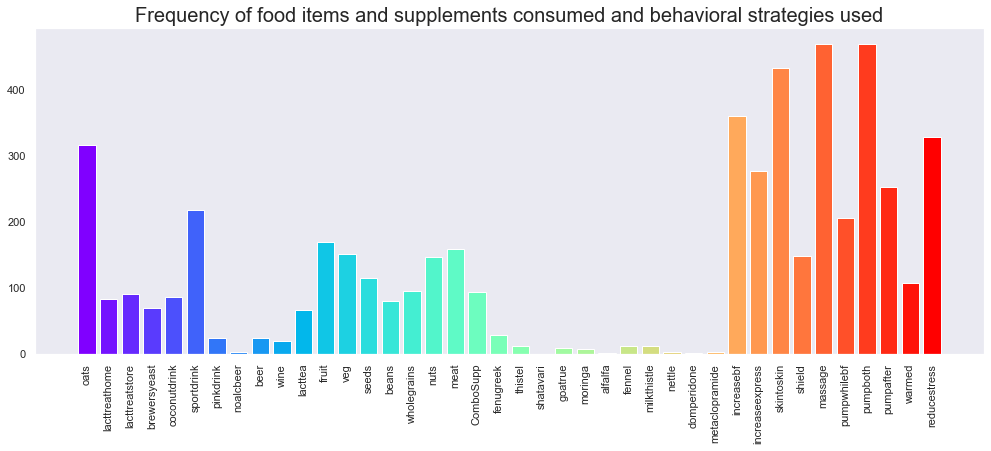

In [23]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.figure(figsize=(17,6))
plt.bar(food_supp_beh_df.columns, food_supp_beh_counts,color = color)
plt.title('Frequency of food items and supplements consumed and behavioral strategies used', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Calculating the support of the food items, supplements and behavioral strategies

In [24]:
support = food_supp_beh_df.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support

,support
pumpboth,0.518764
massage,0.518764
skintoskin,0.477925
increasebf,0.398455
reducestress,0.363135
oats,0.349890
increaseexpress,0.306843
pumpafter,0.279249
sportdrink,0.240618
pumpwhilebf,0.227373


Since the mean was 5.72 ~ 6, so we will set the maximum length of rules as 6.

In [32]:
frequent_itemsets = apriori(food_supp_beh_df, min_support= 0.10, use_colnames=True, max_len = 6)
rules_2 = association_rules(frequent_itemsets, metric="confidence",  min_threshold = 0.5)

/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


To identify our best rules, we will want to execute the following filters.

1. A conviction over 1
2. A leverage over 0
3. A confidence greater than a consequent’s support
4. A Lift over 1

All of these metrics imply a high association that if someone is going to buy our first product ( the antecedent ), they will consume the next product as well ( the consequent ). 

In [33]:
rules_2 = rules_2[(rules_2['conviction']> 1) & (rules_2['leverage']>0 & (rules_2['confidence']> rules_2['consequent support']) )]

In [34]:
display(rules_2.sort_values(by ='confidence', ascending=False).head(30))
print("Rules identified: ", len(rules_2))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
269,"(pumpafter, increasebf, increaseexpress)",(massage),0.121413,0.518764,0.109272,0.900000,1.734894,0.046287,4.812362
65,(warmed),(massage),0.119205,0.518764,0.104857,0.879630,1.695626,0.043017,3.997962
80,"(oats, veg)",(fruit),0.115894,0.187638,0.101545,0.876190,4.669580,0.079799,6.561386
121,"(veg, meat)",(fruit),0.123620,0.187638,0.108168,0.875000,4.663235,0.084972,6.498896
261,"(increasebf, increaseexpress, pumpboth)",(massage),0.155629,0.518764,0.135762,0.872340,1.681575,0.055027,3.769684
155,"(pumpwhilebf, increasebf)",(massage),0.120309,0.518764,0.104857,0.871560,1.680070,0.042445,3.746768
292,"(pumpafter, increasebf, pumpboth)",(massage),0.135762,0.518764,0.118102,0.869919,1.676907,0.047673,3.699503
188,"(pumpwhilebf, increaseexpress)",(massage),0.129139,0.518764,0.111479,0.863248,1.664048,0.044486,3.519040
194,"(pumpafter, increaseexpress)",(massage),0.164459,0.518764,0.141280,0.859060,1.655976,0.055965,3.414485
248,"(oats, increasebf, pumpboth)",(massage),0.124724,0.518764,0.107064,0.858407,1.654717,0.042362,3.398731


Rules identified:  326


In [35]:
display(rules_2.sort_values(by ='support', ascending=False).head(30))
print("Rules identified: ", len(rules_2))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(massage),(pumpboth),0.518764,0.518764,0.366446,0.706383,1.361666,0.097330,1.638993
63,(pumpboth),(massage),0.518764,0.518764,0.366446,0.706383,1.361666,0.097330,1.638993
54,(massage),(skintoskin),0.518764,0.477925,0.263797,0.508511,1.063997,0.015867,1.062231
53,(skintoskin),(massage),0.477925,0.518764,0.263797,0.551963,1.063997,0.015867,1.074099
41,(massage),(increasebf),0.518764,0.398455,0.259382,0.500000,1.254848,0.052678,1.203091
40,(increasebf),(massage),0.398455,0.518764,0.259382,0.650970,1.254848,0.052678,1.378780
43,(increasebf),(pumpboth),0.398455,0.518764,0.243929,0.612188,1.180091,0.037225,1.240902
38,(increasebf),(skintoskin),0.398455,0.477925,0.243929,0.612188,1.280930,0.053498,1.346208
39,(skintoskin),(increasebf),0.477925,0.398455,0.243929,0.510393,1.280930,0.053498,1.228628
47,(increaseexpress),(massage),0.306843,0.518764,0.238411,0.776978,1.497750,0.079231,2.157801


Rules identified:  326


__Network graph for representing the top 7 rules__

<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
/var/folders/jk/45pfmj415lb9l0__2lq4xmr40000gn/T/ipykernel_10229/710546070.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


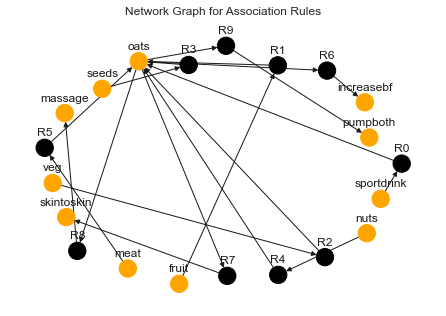

In [36]:
def draw_network(rules, rules_to_show):
      # Directional Graph from NetworkX
  network = nx.DiGraph(directed=True)
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12
  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules_2, 10)